In [1]:
def import_np(module_name):
    if module_name == 'mxnet':
        from mxnet import np, npx
        npx.set_np()
        np.randn = np.random.randn
        return np
    elif module_name == 'torch':
        import torch as np
        np.array = np.tensor
        np.concatenate = np.cat
        return np
    elif module_name == 'tensorflow':
        from tensorflow.experimental import numpy as np
        return np


np = import_np('mxnet')  # 'mxnet', 'torch', 'tensorflow'

In [2]:
from IPython import display
%matplotlib inline


def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
import xinet

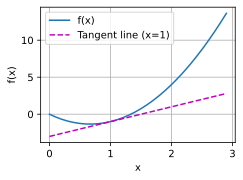

In [4]:
x = np.arange(0, 3, 0.1)
xinet.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [5]:
fair_probs = [1.0 / 6] * 6
fair_probs

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [6]:
import time

In [7]:
from xinet.utils.timer import Timer

In [8]:
n = int(1e7)
import numpy as np
a = np.ones(n)
b = np.ones(n)

In [9]:
c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'8.43897 sec'

In [10]:
timer.start()
d = a + b
f'{timer.stop():.30f} sec'

'0.043725252151489257812500000000 sec'

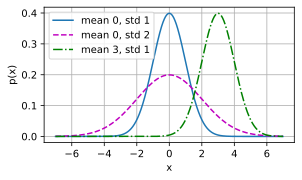

In [12]:
def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma**2 * (x-mu)**2)

# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
xinet.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [13]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [14]:
print('features:', features[0], '\nlabel:', labels[0])

features: [-0.19563956  1.14314773] 
label: [-0.07244467]


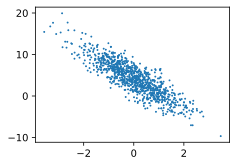

In [16]:
xinet.set_figsize()
xinet.plt.scatter(features[:, (1)], labels, 1);